In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [3]:
whr = pd.read_csv('World_Happiness_Report/2019.csv')

In [4]:
whr.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [5]:
whr.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


Данные без пропусков. Распределения по столбцам немного ассимитречные т.к. среднее и медиана немного отличаютсяю. Величины  __overall rank__ и __Score__ яляются расчётными, остальные получены в результате проводимых опросов респондентов в соответсвующих странах.

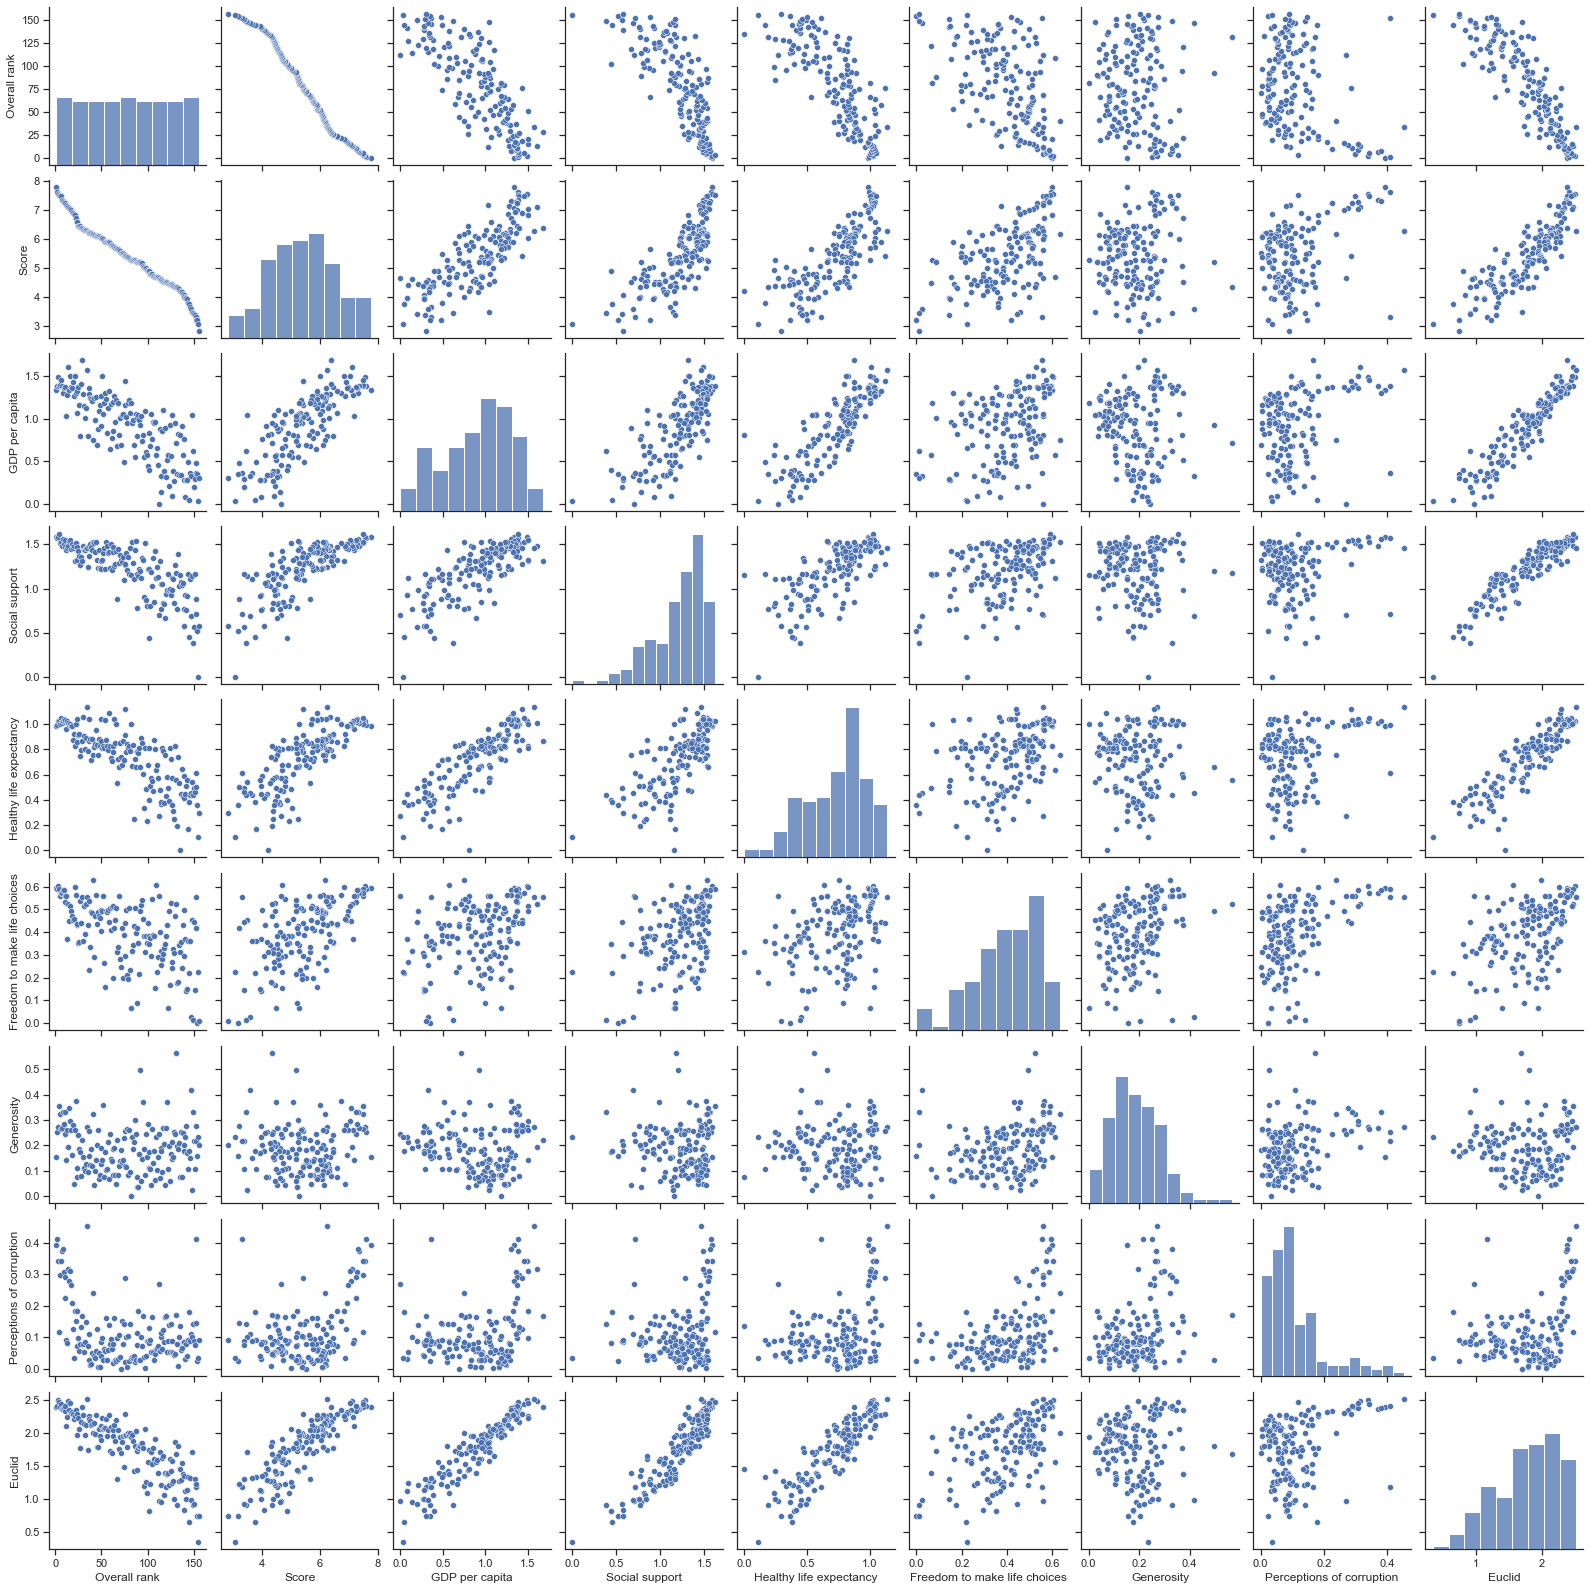

In [41]:
# scatter_matrix(whr, alpha=0.2, figsize=(12, 12), diagonal="kde");
sns.pairplot(whr, height=2.5)

Text(0.5, 1.0, 'GDP per capita')

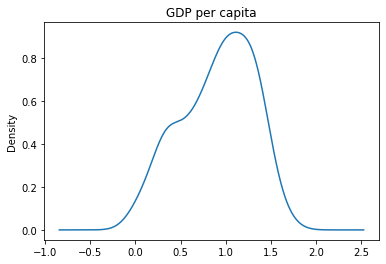

In [17]:
# whr.hist('GDP per capita', bins=30, density=True)
whr['GDP per capita'].plot.kde()
plt.title('GDP per capita')

Предположим что данное распределение является суммой двух функций Гауссовых функций. Но для анализа буду использовать не сами данные, а подсчитаю евклидово расстояние для векторов `whr[ whr.columns[3:8] ]`.

In [13]:
def Euclid(row, column_names):
    """
    Функция возвращающая модуль вектора.
    """
    sum = 0
    for item in column_names:
        sum = sum + row[item]**2
    return np.sqrt(sum)

In [14]:
whr['Euclid'] = whr.apply(Euclid, column_names = whr.columns[3:8], axis=1)

In [15]:
whr['Euclid'].median(), whr['Euclid'].mean()

(1.8436614623023222, 1.7630387101338694)

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


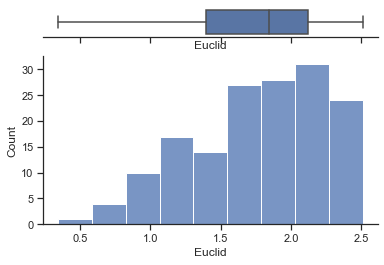

In [187]:
# whr['Euclid'].plot.kde(bw_method=0.3)
# plt.title('Евклидово расстояние.')
# plt.vlines(whr['Euclid'].median(), 0, 0.9, color='red')

sns.set(style="ticks")

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(whr['Euclid'], ax=ax_box)
sns.histplot(whr['Euclid'], ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)


Разделим данные на две группы.
* Группа A - страны с ВВП на душу населения меньше медианного значения и
* Группа B - страны с ВВП на душу населения больше медианного значения.

In [35]:
# группа А <= const
# группа В >const

def which_group(x, const):
    """
    Функция для сортировки.
    """
    if x<= const:
        return 'A'
    else:
        return 'B'

In [37]:
whr['Group'] = whr['Euclid'].apply(which_group, const = whr['Euclid'].median())
whr.sample(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Euclid,Group
142,143,Madagascar,3.933,0.274,0.916,0.555,0.148,0.169,0.041,1.128105,A
117,118,Guinea,4.534,0.380,0.829,0.375,0.332,0.207,0.086,1.060820,A
12,13,Israel,7.139,1.276,1.455,1.029,0.371,0.261,0.082,2.238259,B
74,75,Croatia,5.432,1.155,1.266,0.914,0.296,0.119,0.022,1.968236,B
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2.406866,B


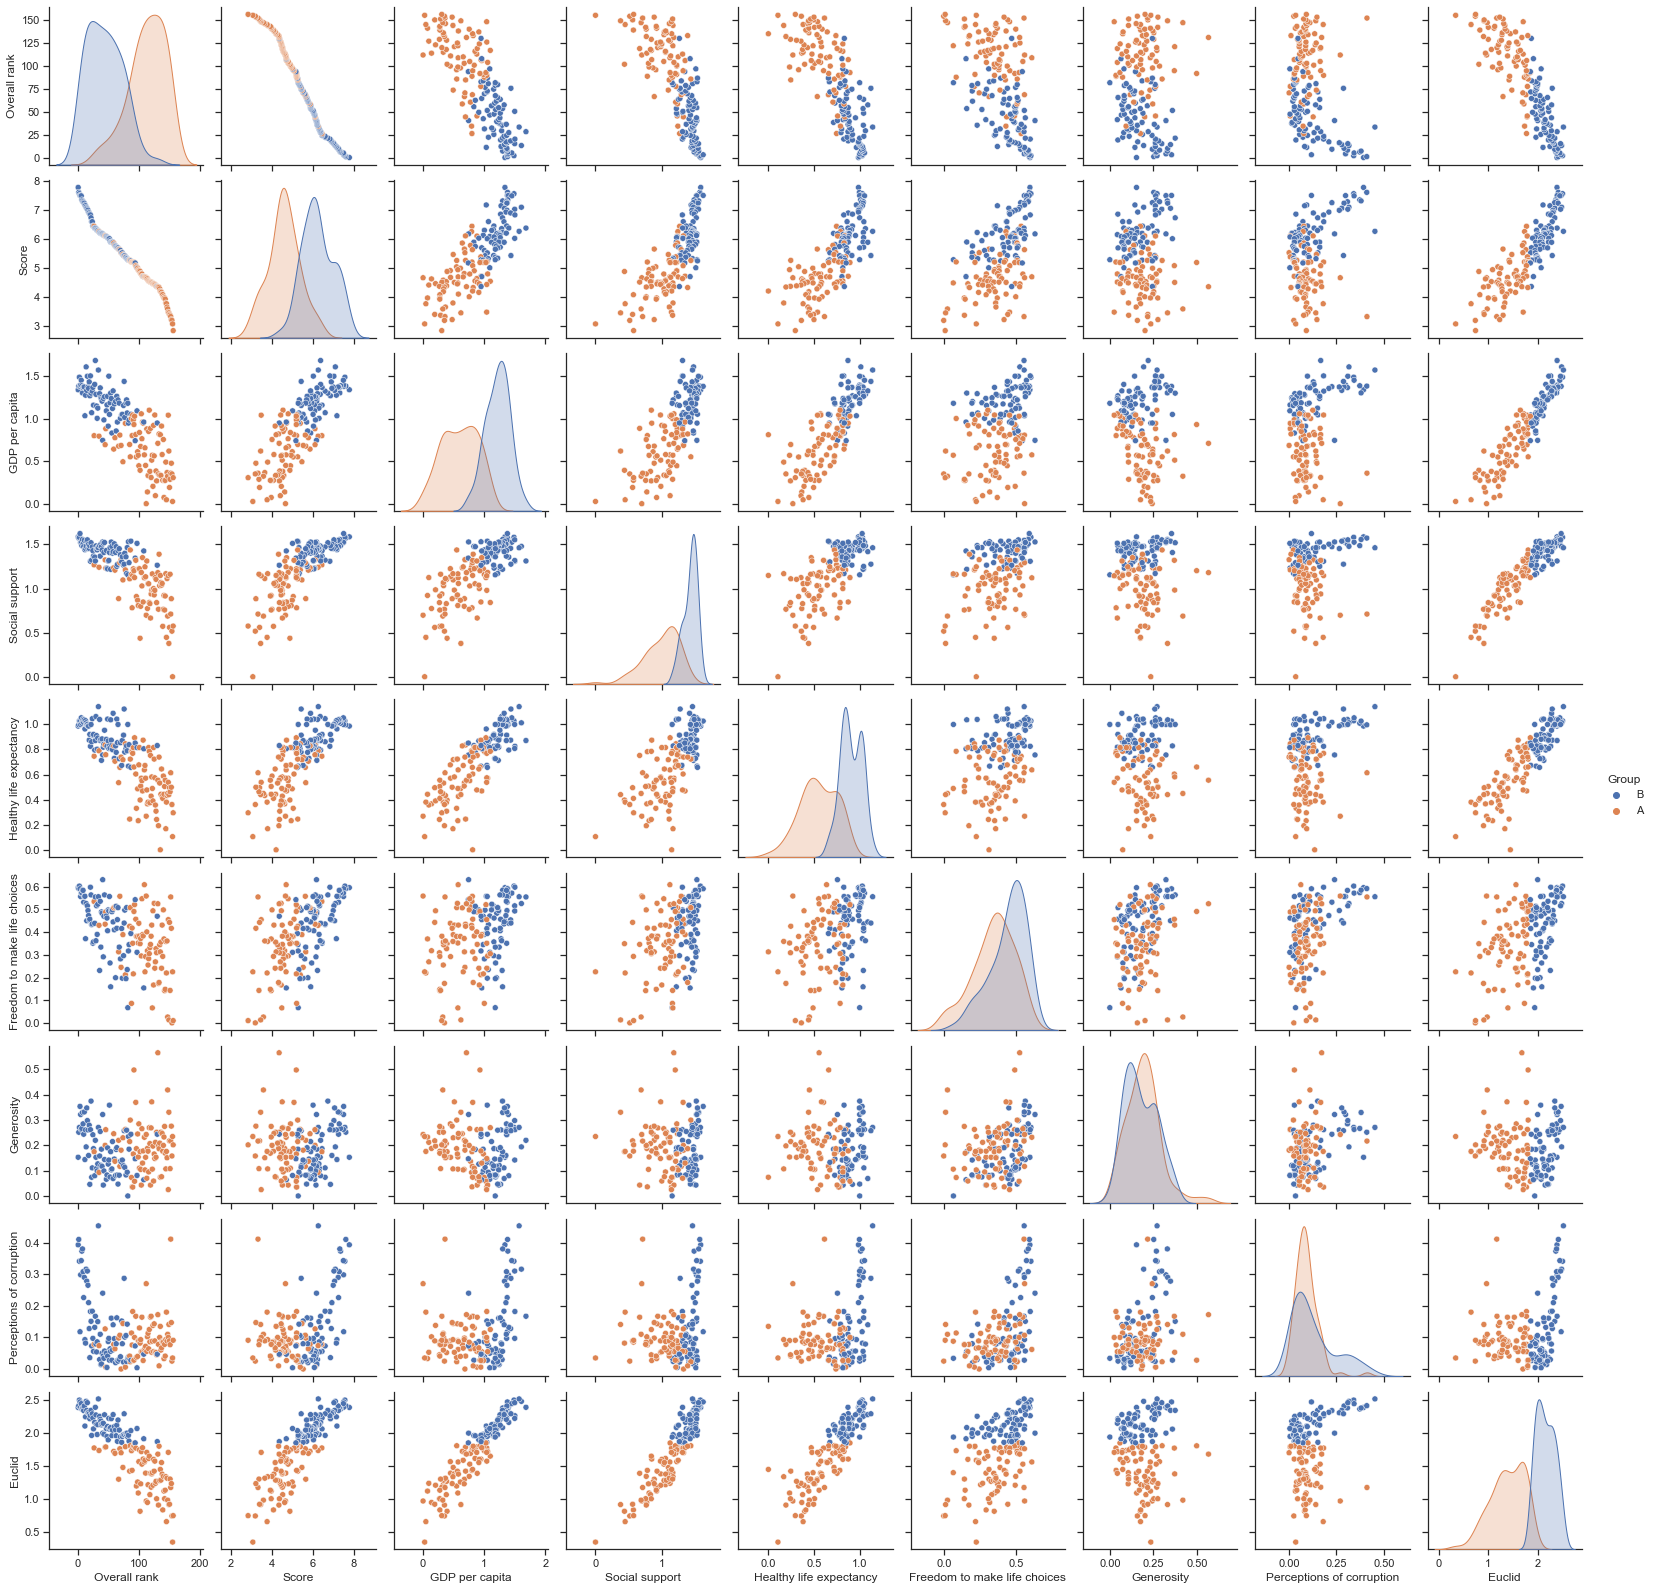

In [42]:
sns.pairplot(whr, hue="Group", height=2.5)

Из графиков видно что такие параметры как __Generosity__(благотворительность) и __Freedom to make life choices__, при данном способе группировке данных не позволяют сделать какие-то конкретные выводы. Видно что есть страны с маленьким ВВП, но высоким упрвнем благотворительности, равно как и наоборот.
Интересно, что процент корумпированности в странх с высоким ВВП, по оценкам респондентов, выше чем в группе A. Посмотрим эти распредеоения подробнее.

In [104]:
# Выделим несколько стран для сравнения.
ru = whr[ whr['Country or region'] == 'Russia']
ge = whr[ whr['Country or region'] == 'Germany']
us = whr[ whr['Country or region'] == 'United States']
ch = whr[ whr['Country or region'] == 'China']
jp = whr[ whr['Country or region'] == 'Japan']
bz = whr[ whr['Country or region'] == 'Brazil']
worst = whr[ whr.Score == whr['Score'].min() ]
best = whr[ whr.Score == whr['Score'].max() ]

Интересный параметр: Perceptions of corruption (восприятие корупции). Не понятно что он означает,но существует группа стран в которых величина этого значения превышает 0.2. Лидеры рейтинга - фины (максимальный рейтин согласно рассматриваемым данным ООН за 2019) присутствуют в этом списке. Интересно что в этот список попали такие страны как: Сомали, Руанда, Узбекистан и Гонг-Конг, являющийся частью Китая. Так же, судя по всему, этот параметр имеет большой вес в расчёта рейтинга страны, как мы увидим ниже.

In [180]:
whr[ whr['Perceptions of corruption'] > 0.2 ]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Euclid,Group
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2.380124,B
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2.406866,B
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2.492128,B
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2.382695,B
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343,2.437219,B
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373,2.356647,B
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380,2.371889,B
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308,2.372773,B
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226,2.333199,B
10,11,Australia,7.228,1.372,1.548,1.036,0.557,0.332,0.290,2.402594,B


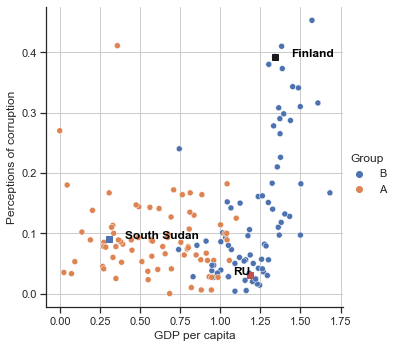

In [181]:
sns.relplot(x="GDP per capita", y="Perceptions of corruption", hue="Group", data=whr);
plt.plot(ru['GDP per capita'], ru['Perceptions of corruption'], 'rs')
plt.text(ru['GDP per capita']-0.1, ru['Perceptions of corruption'], "RU", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.plot(worst['GDP per capita'], worst['Perceptions of corruption'], 'bs')
plt.text(worst['GDP per capita']+0.1, worst['Perceptions of corruption'], worst.loc[worst.index[0]][1], horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.plot(best['GDP per capita'], best['Perceptions of corruption'], 'ks')
plt.text(best['GDP per capita']+0.1, best['Perceptions of corruption'], best.loc[best.index[0]][1], horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.grid()

Похожая картина наблюдается и для параметра __Freedom to make life choices__.

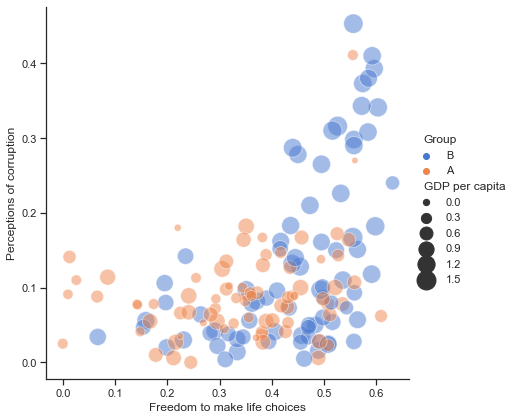

In [182]:
# whr.boxplot(list(whr.columns[3:8]))
sns.relplot(x="Freedom to make life choices", y="Perceptions of corruption", hue="Group", size="GDP per capita",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=whr)

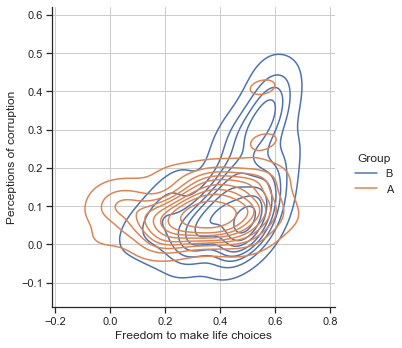

In [183]:
sns.displot(whr, x="Freedom to make life choices", y="Perceptions of corruption", hue="Group", kind="kde")
# sns.displot(whr, x="Freedom to make life choices", y="Perceptions of corruption", hue="Group")
plt.grid()

Диаграмма рассеяния: социальная поддержка vs. ожидаемая продолжительность жизни. Всё логично: больше поддержки, дольше жизнь.

Text(67    0.626
Name: Healthy life expectancy, dtype: float64, 67    1.452
Name: Social support, dtype: float64, 'RU')

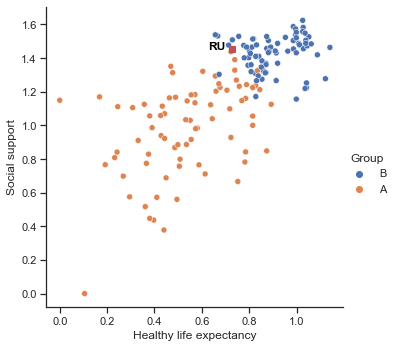

In [184]:
sns.relplot(x="Healthy life expectancy", y="Social support", hue="Group", data=whr);
plt.plot(ru['Healthy life expectancy'], ru['Social support'], 'rs')
plt.text(ru['Healthy life expectancy']-0.1, ru['Social support'], "RU", horizontalalignment='left', size='medium', color='black', weight='semibold')

Исходя из вида распределения величины Score, можно предположить, что используя более продвинутые методы классификации данных возможно обнаружить тонкие структуры. Данные можно разбить на четыре подгруппы, как минимум.

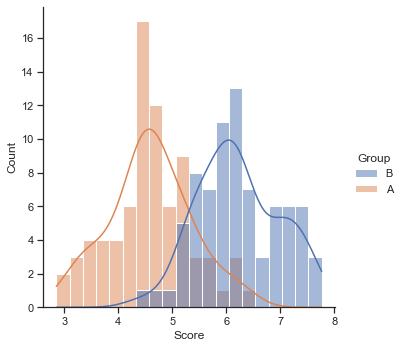

In [185]:
sns.displot(whr, x="Score", kde=True, hue="Group", bins=20)

Распределение стран на диаграмме Overall rank vs. Score.

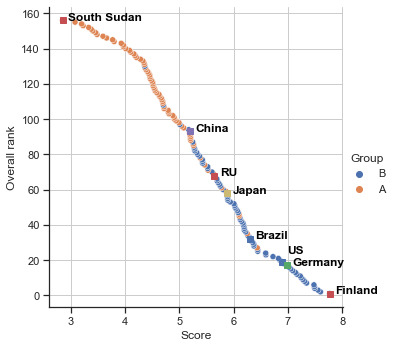

In [186]:
sns.relplot(x="Score", y="Overall rank", hue="Group", markers=True, data=whr);
plt.plot(ru['Score'], ru['Overall rank'], 'rs')
plt.text(ru['Score']+0.1, ru['Overall rank'], "RU", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.plot(us['Score'], us['Overall rank'], 'bs')
plt.text(us['Score']+0.1, us['Overall rank']+5, "US", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.plot(ge['Score'], ge['Overall rank'], 'gs')
plt.text(ge['Score']+0.1, ge['Overall rank'], "Germany", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.plot(ch['Score'], ch['Overall rank'], 'ms')
plt.text(ch['Score']+0.1, ch['Overall rank'], "China", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.plot(jp['Score'], jp['Overall rank'], 'ys')
plt.text(jp['Score']+0.1, jp['Overall rank'], "Japan", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.plot(bz['Score'], bz['Overall rank'], 'bs')
plt.text(bz['Score']+0.1, bz['Overall rank'], "Brazil", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.plot(best['Score'], best['Overall rank'], 'rs')
plt.text(best['Score']+0.1, best['Overall rank'], best.loc[best.index[0]][1], horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.plot(worst['Score'], worst['Overall rank'], 'rs')
plt.text(worst['Score']+0.1, worst['Overall rank'], worst.loc[worst.index[0]][1], horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.grid()

Следующее сравнение стран проясняет ситуацию почему Бразилия имеет оценку выше чем Россия, больше восприятие коррупции. А так же видим что по мнению экспертов ООН значение благотворительности для ощущения счастья более весом, т.к. Япония только по этому параметру уступает Бразилии, но рейтиг имеет меньший.

Text(0.5, 1.0, 'Сравнение Германии, России, Японии и Бразилии.')

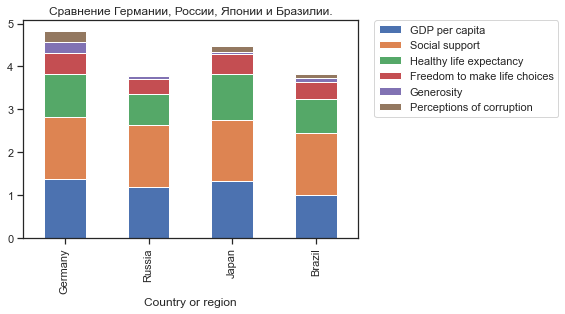

In [178]:
new = pd.concat([ge, ru, jp, bz])
new[['Country or region',
     'GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption'
]].plot.bar(x='Country or region', stacked=True);
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Сравнение Германии, России, Японии и Бразилии.')